=== Online Market Discovery - Feature Engineering ===
Task: Create German-specific features for online shop detection
Training data shape: (2722487, 8)
Test data shape: (841139, 7)
Creating features for training data sample...
Creating features...
Sampling 10000 rows for faster processing...
Extracting URL features...
Extracting text features...
Extracting brand features...
Created 20 engineered features
Training sample shape: (10000, 29)

New engineered features:
['combined_text', 'url_length', 'num_subdomains', 'has_https', 'has_shop_keywords', 'has_ecommerce_keywords', 'num_path_segments', 'has_product_keywords', 'domain_length', 'has_product_path', 'text_length', 'num_words', 'has_price_indicators', 'has_shop_language', 'has_product_language', 'has_german_shop_terms', 'has_availability_terms', 'price_mention_count', 'brand_length', 'is_known_brand', 'brand_word_count']

=== Feature Distribution Analysis ===
Feature value distributions:
url_length: {76: 202, 60: 150, 68: 144}
num_su

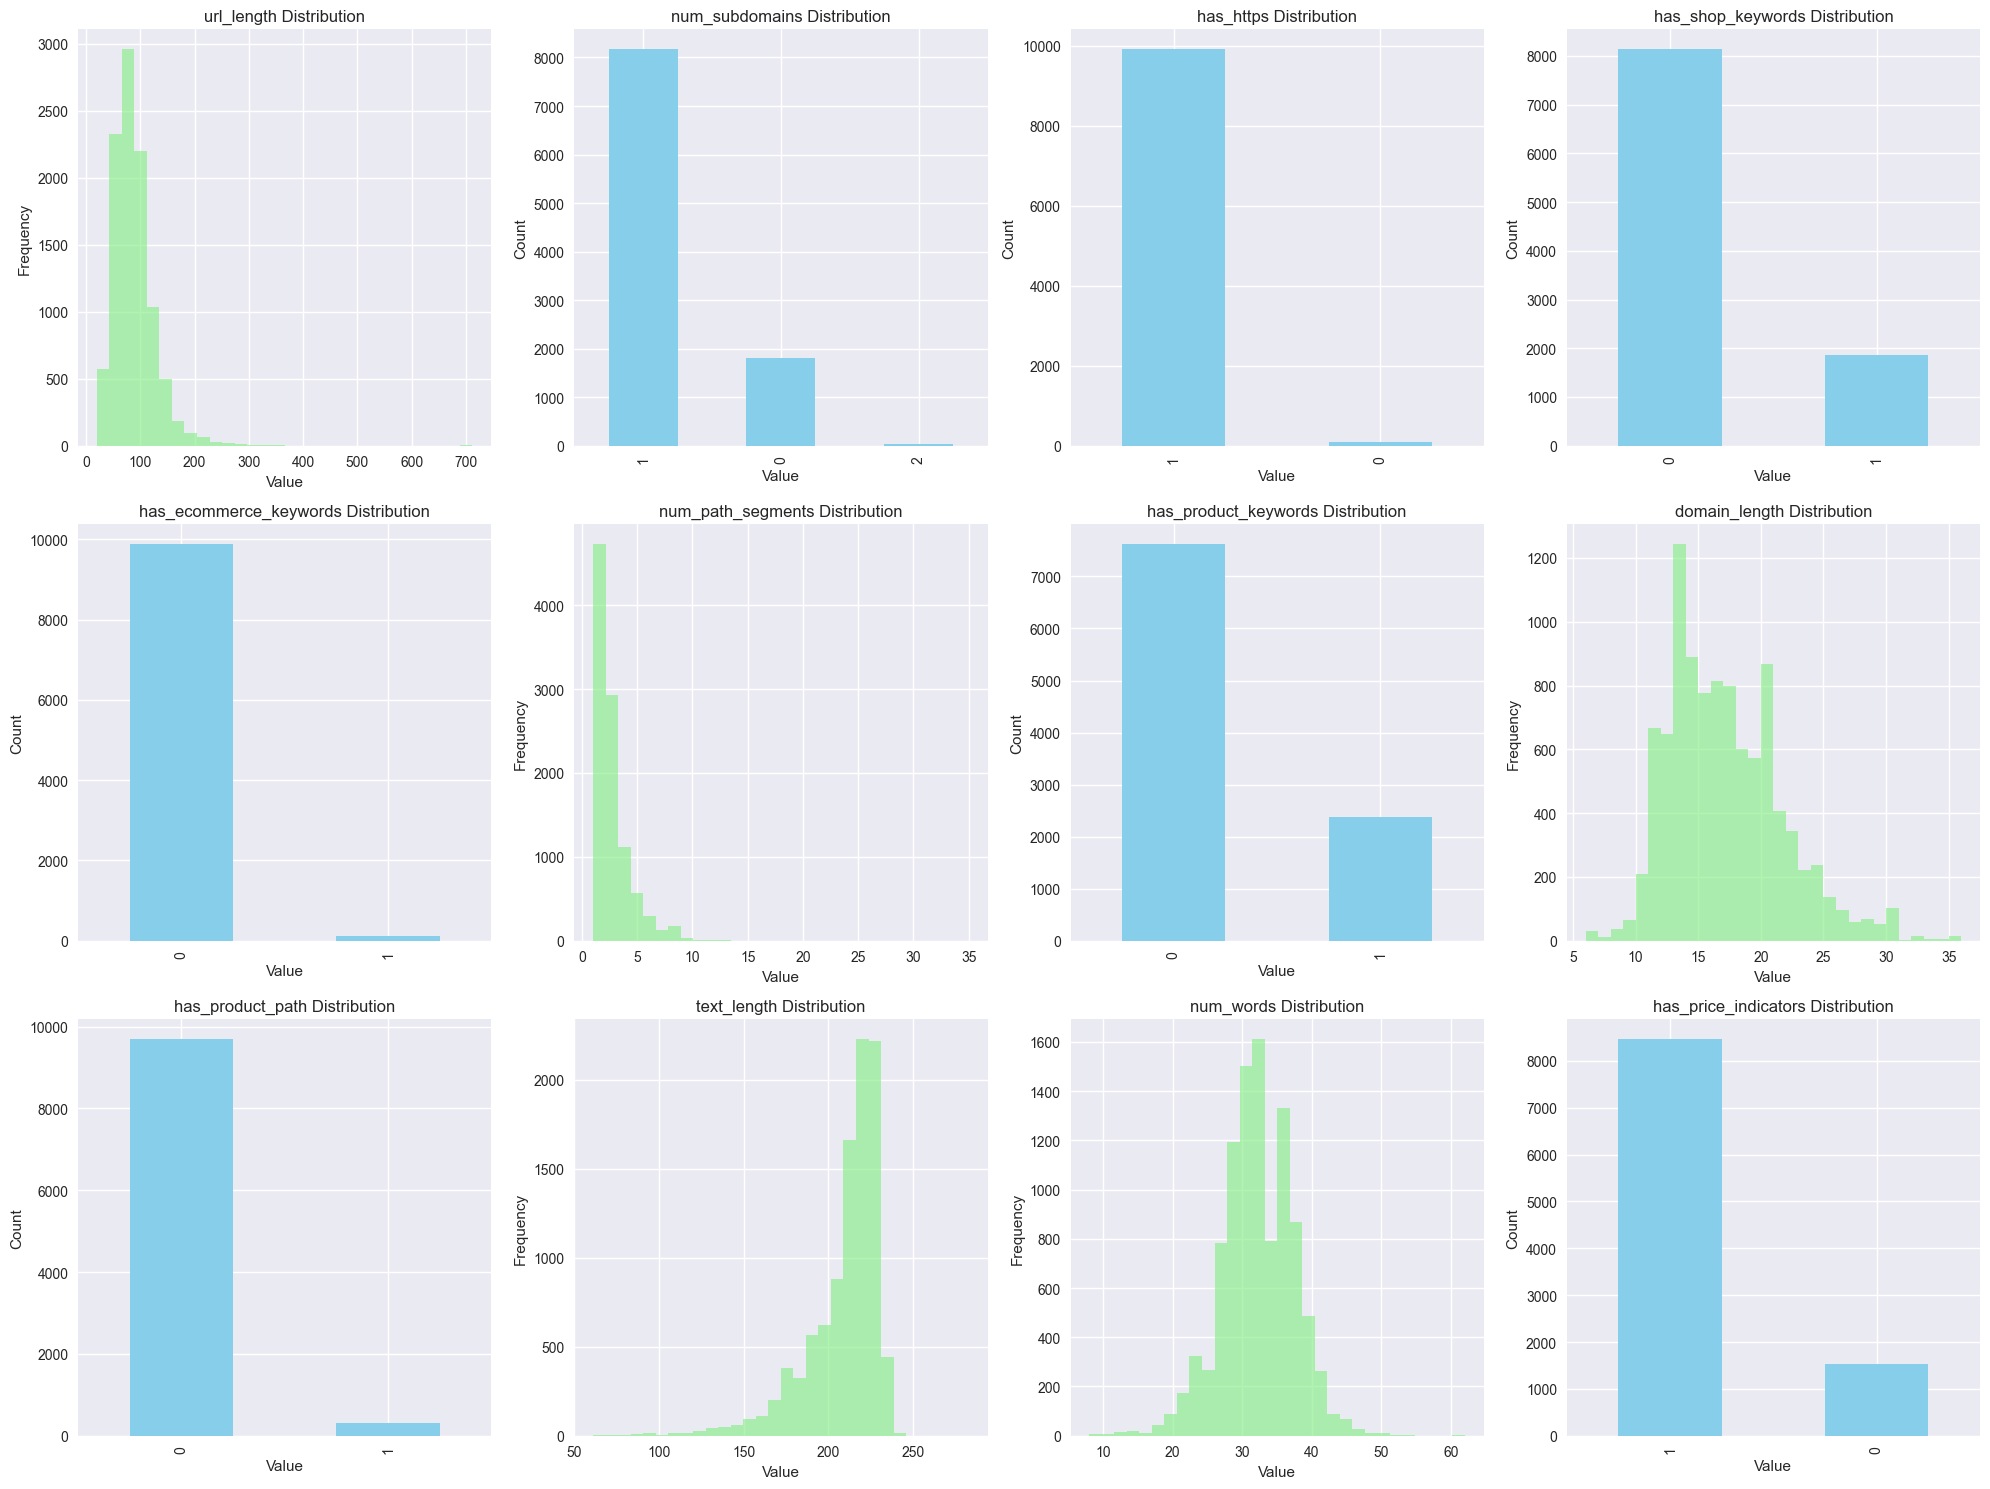


=== Feature Correlation Analysis ===
Top 10 features by correlation with target:
has_shop_keywords: 0.2410
has_availability_terms: 0.1821
has_price_indicators: 0.1495
has_product_path: 0.1340
has_german_shop_terms: 0.1327
has_product_language: 0.1052
num_path_segments: -0.0823
has_https: 0.0612
domain_length: 0.0591
has_ecommerce_keywords: 0.0544


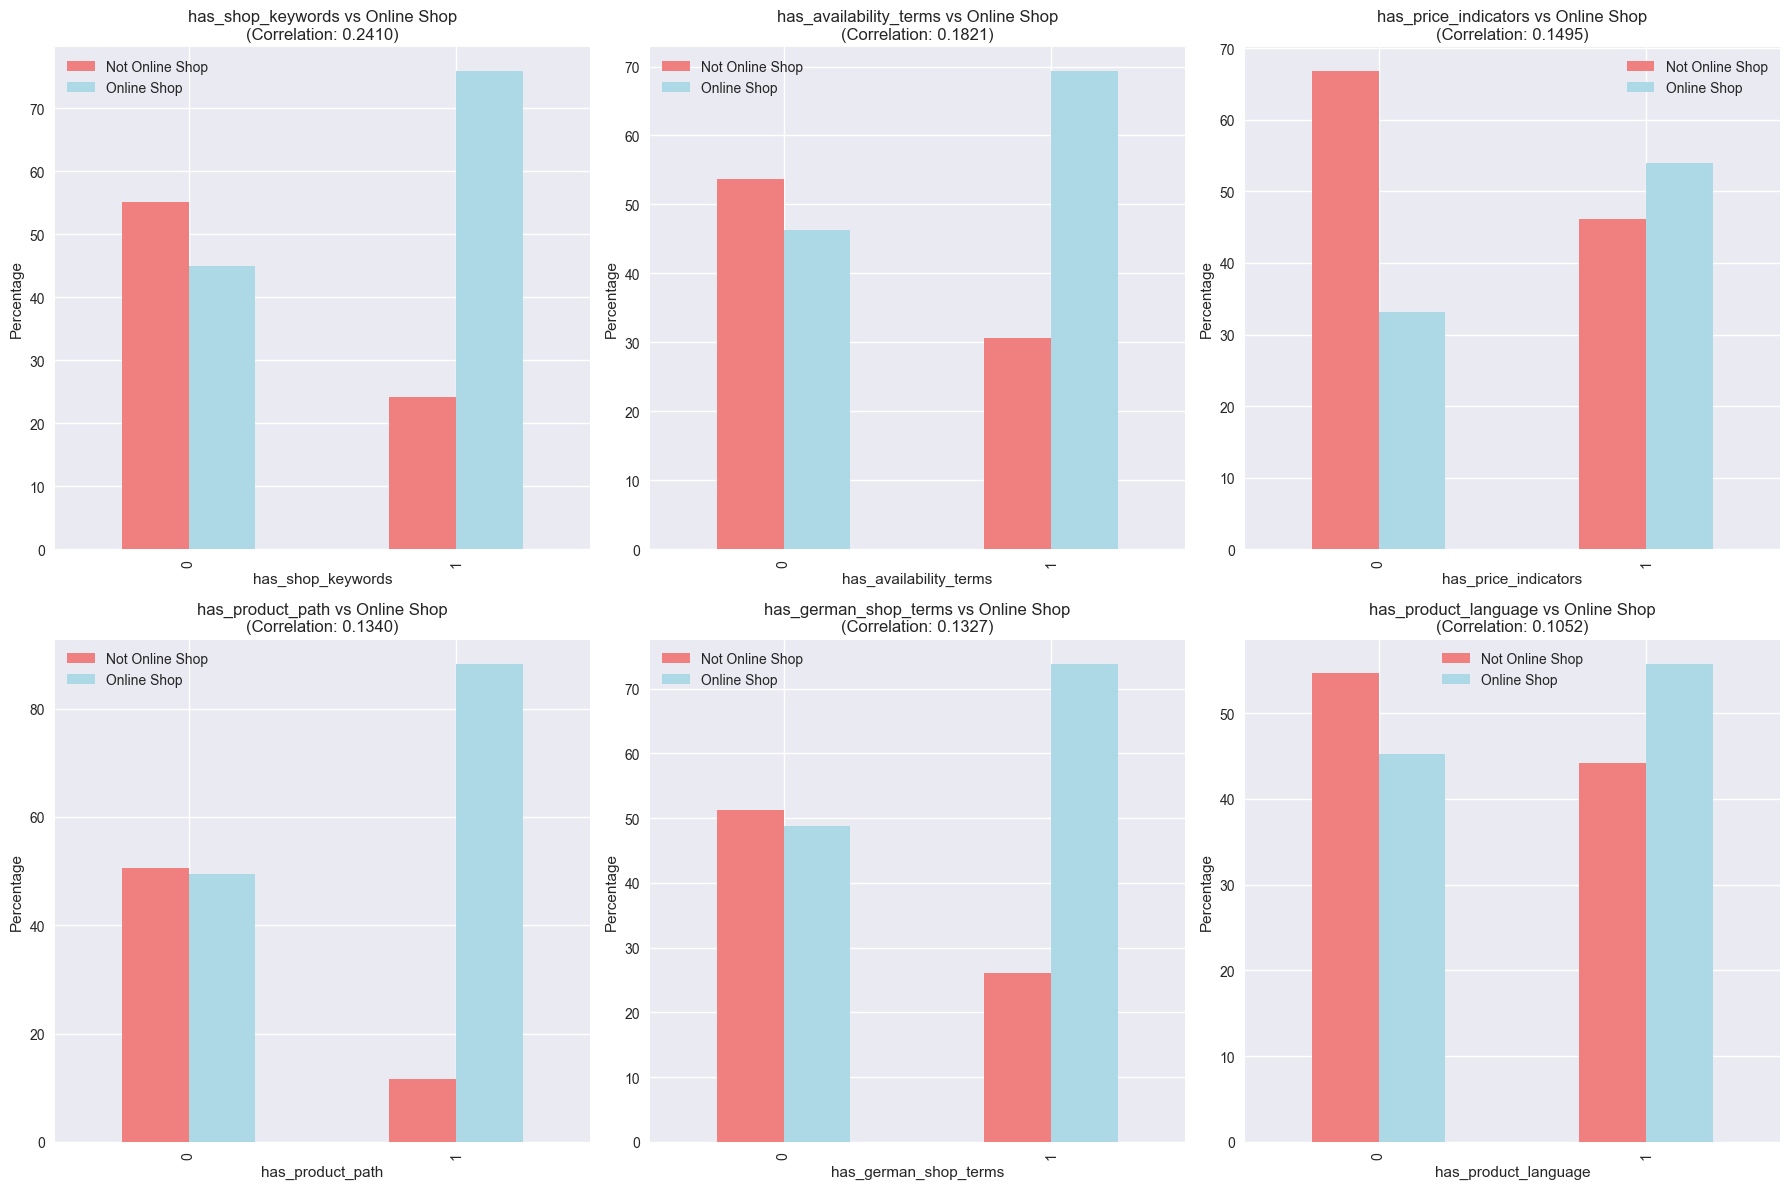


=== Feature Quality Assessment ===
Feature Quality Metrics (Top 10 by entropy):
                      unique_values  missing_rate  zero_rate  entropy  \
url_length                    256.0           0.0     0.0000   7.0123   
text_length                   159.0           0.0     0.0000   6.0639   
num_words                      48.0           0.0     0.0000   4.4123   
domain_length                  31.0           0.0     0.0000   4.0879   
brand_length                   14.0           0.0     0.0000   3.2250   
num_path_segments              15.0           0.0     0.0000   2.4816   
price_mention_count             7.0           0.0     0.1537   2.0031   
has_product_language            2.0           0.0     0.4830   0.9992   
has_shop_language               2.0           0.0     0.3432   0.9278   
has_product_keywords            2.0           0.0     0.7619   0.7919   

                       variance  
url_length            1422.3591  
text_length            494.6768  
num_words    

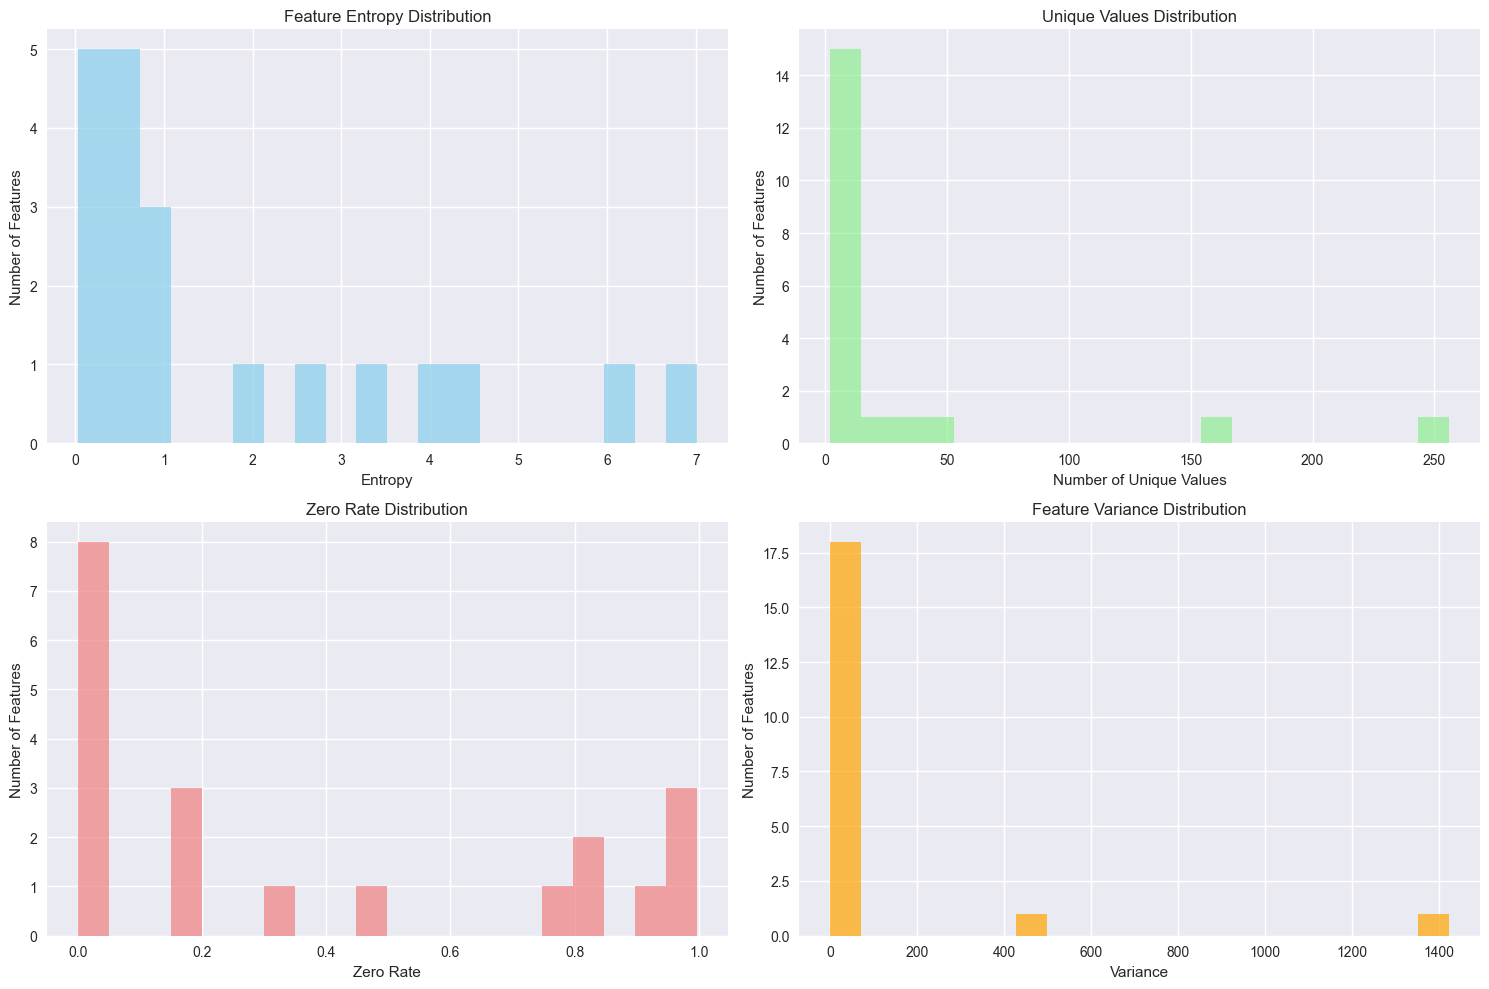


=== Feature Selection Recommendations ===
Recommended features (high correlation + high quality):
  num_path_segments: correlation=-0.0823, entropy=2.4816
  has_product_language: correlation=0.1052, entropy=0.9992
  domain_length: correlation=0.0591, entropy=4.0879

All good features (17 total):
  has_ecommerce_keywords: correlation=0.0544
  url_length: correlation=0.0406
  text_length: correlation=-0.0401
  has_shop_keywords: correlation=0.2410
  price_mention_count: correlation=0.0034
  brand_length: correlation=-0.0418
  domain_length: correlation=0.0591
  has_product_path: correlation=0.1340
  has_product_keywords: correlation=-0.0045
  has_price_indicators: correlation=0.1495
  has_https: correlation=0.0612
  has_shop_language: correlation=0.0492
  num_words: correlation=0.0149
  num_path_segments: correlation=-0.0823
  has_product_language: correlation=0.1052
  has_availability_terms: correlation=0.1821
  has_german_shop_terms: correlation=0.1327

Saving processed data to train_

In [2]:
# Online Market Discovery - Feature Engineering
# Notebook 02: Creating German-Specific Features

# =============================================================================
# IMPORTS AND SETUP
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("=== Online Market Discovery - Feature Engineering ===")
print("Task: Create German-specific features for online shop detection")
print("="*60)

# =============================================================================
# LOAD DATA (from previous notebook)
# =============================================================================

# Load the datasets
train_df = pd.read_csv('DE_online_market_discovery_train.csv')
test_df = pd.read_csv('DE_online_market_discovery_test.csv')

print(f"Training data shape: {train_df.shape}")
print(f"Test data shape: {test_df.shape}")

# =============================================================================
# URL FEATURE EXTRACTION
# =============================================================================

def extract_url_features(url):
    """Extract features from URL"""
    if pd.isna(url):
        return {
            'url_length': 0,
            'num_subdomains': 0,
            'has_https': 0,
            'has_shop_keywords': 0,
            'has_ecommerce_keywords': 0,
            'num_path_segments': 0,
            'has_product_keywords': 0,
            'domain_length': 0,
            'has_product_path': 0
        }
    
    url = str(url).lower()
    
    # Shop-related keywords in German and English
    shop_keywords = ['shop', 'store', 'laden', 'kaufen', 'verkauf', 'handel', 'market', 'markt', 'webshop', 'onlineshop']
    ecommerce_keywords = ['cart', 'basket', 'checkout', 'warenkorb', 'kasse', 'bestellen', 'order', 'buy', 'purchase']
    product_keywords = ['produkt', 'product', 'artikel', 'item', 'ware', 'goods', '/p/', '/prod/', '/article/']
    
    # Extract domain
    domain_match = re.search(r'https?://([^/]+)', url)
    domain = domain_match.group(1) if domain_match else ''
    
    features = {
        'url_length': len(url),
        'num_subdomains': len(domain.split('.')) - 2 if domain else 0,
        'has_https': 1 if url.startswith('https') else 0,
        'has_shop_keywords': 1 if any(keyword in url for keyword in shop_keywords) else 0,
        'has_ecommerce_keywords': 1 if any(keyword in url for keyword in ecommerce_keywords) else 0,
        'num_path_segments': len(url.split('/')) - 3 if '://' in url else 0,
        'has_product_keywords': 1 if any(keyword in url for keyword in product_keywords) else 0,
        'domain_length': len(domain),
        'has_product_path': 1 if '/product/' in url or '/artikel/' in url else 0
    }
    
    return features

# =============================================================================
# TEXT FEATURE EXTRACTION
# =============================================================================

def extract_text_features(text):
    """Extract features from text content (title + snippet)"""
    if pd.isna(text):
        return {
            'text_length': 0,
            'num_words': 0,
            'has_price_indicators': 0,
            'has_shop_language': 0,
            'has_product_language': 0,
            'has_german_shop_terms': 0,
            'has_availability_terms': 0,
            'price_mention_count': 0
        }
    
    text = str(text).lower()
    
    # German shop-related terms
    price_indicators = ['€', 'eur', 'preis', 'price', 'kosten', 'cost', 'günstig', 'cheap', 'angebot', 'sale', 'rabatt', 'discount']
    shop_language = ['kaufen', 'verkauf', 'bestellen', 'order', 'warenkorb', 'cart', 'kasse', 'checkout', 'versand', 'lieferung']
    product_language = ['produkt', 'product', 'artikel', 'item', 'verfügbar', 'available', 'lager', 'stock', 'qualität', 'quality']
    german_shop_terms = ['online shop', 'webshop', 'internetshop', 'onlineshop', 'e-shop', 'shopping']
    availability_terms = ['auf lager', 'lieferbar', 'sofort', 'schnell', 'express', 'delivery', 'shipping']
    
    features = {
        'text_length': len(text),
        'num_words': len(text.split()),
        'has_price_indicators': 1 if any(indicator in text for indicator in price_indicators) else 0,
        'has_shop_language': 1 if any(term in text for term in shop_language) else 0,
        'has_product_language': 1 if any(term in text for term in product_language) else 0,
        'has_german_shop_terms': 1 if any(term in text for term in german_shop_terms) else 0,
        'has_availability_terms': 1 if any(term in text for term in availability_terms) else 0,
        'price_mention_count': sum(1 for indicator in price_indicators if indicator in text)
    }
    
    return features

# =============================================================================
# BRAND FEATURE EXTRACTION
# =============================================================================

def extract_brand_features(brand):
    """Extract features from brand information"""
    if pd.isna(brand):
        return {
            'brand_length': 0,
            'is_known_brand': 0,
            'brand_word_count': 0
        }
    
    brand = str(brand).lower()
    
    # Known e-commerce/retail brands (can be expanded)
    known_brands = ['amazon', 'ebay', 'otto', 'zalando', 'mediamarkt', 'saturn', 'conrad', 'alternate']
    
    features = {
        'brand_length': len(brand),
        'is_known_brand': 1 if any(kb in brand for kb in known_brands) else 0,
        'brand_word_count': len(brand.split())
    }
    
    return features

# =============================================================================
# COMPREHENSIVE FEATURE CREATION
# =============================================================================

def create_features(df, sample_size=None):
    """Create comprehensive feature set"""
    print("Creating features...")
    
    # Sample data for faster processing if needed
    if sample_size and len(df) > sample_size:
        print(f"Sampling {sample_size} rows for faster processing...")
        df = df.sample(n=sample_size, random_state=42).reset_index(drop=True)
    
    # Combine title and snippet for text analysis
    df['combined_text'] = df['title'].fillna('') + ' ' + df['snippet'].fillna('')
    
    print("Extracting URL features...")
    # Extract URL features
    url_features = df['url'].apply(extract_url_features)
    url_features_df = pd.DataFrame(url_features.tolist())
    
    print("Extracting text features...")
    # Extract text features
    text_features = df['combined_text'].apply(extract_text_features)
    text_features_df = pd.DataFrame(text_features.tolist())
    
    print("Extracting brand features...")
    # Extract brand features
    brand_features = df['brand'].apply(extract_brand_features)
    brand_features_df = pd.DataFrame(brand_features.tolist())
    
    # Combine features
    features_df = pd.concat([
        df.reset_index(drop=True), 
        url_features_df, 
        text_features_df,
        brand_features_df
    ], axis=1)
    
    print(f"Created {len(url_features_df.columns) + len(text_features_df.columns) + len(brand_features_df.columns)} engineered features")
    return features_df

# =============================================================================
# FEATURE CREATION
# =============================================================================

# Create features for a sample first (to avoid memory issues)
print("Creating features for training data sample...")
SAMPLE_SIZE = 10000  # Start with 10k samples

train_sample = create_features(train_df, sample_size=SAMPLE_SIZE)
print(f"Training sample shape: {train_sample.shape}")

# Show the new features
print("\nNew engineered features:")
engineered_features = [col for col in train_sample.columns if col not in train_df.columns]
print(engineered_features)

# =============================================================================
# FEATURE ANALYSIS
# =============================================================================

def analyze_feature_distributions(df):
    """Analyze the distribution of engineered features"""
    print("\n=== Feature Distribution Analysis ===")
    
    # Get engineered features
    engineered_features = [col for col in df.columns if col not in train_df.columns]
    
    # Show feature value distributions
    print("Feature value distributions:")
    for feature in engineered_features[:15]:  # Show first 15 features
        if df[feature].dtype in ['int64', 'float64']:
            print(f"{feature}: {df[feature].value_counts().head(3).to_dict()}")
    
    # Visualize feature distributions
    numeric_features = [col for col in engineered_features if df[col].dtype in ['int64', 'float64']]
    
    if len(numeric_features) > 0:
        # Create subplots for feature distributions
        n_features = min(12, len(numeric_features))
        fig, axes = plt.subplots(3, 4, figsize=(20, 15))
        axes = axes.flatten()
        
        for i, feature in enumerate(numeric_features[:n_features]):
            ax = axes[i]
            
            if df[feature].nunique() <= 10:  # Categorical-like features
                df[feature].value_counts().plot(kind='bar', ax=ax, color='skyblue')
                ax.set_title(f'{feature} Distribution')
                ax.set_xlabel('Value')
                ax.set_ylabel('Count')
            else:  # Continuous features
                df[feature].hist(bins=30, ax=ax, color='lightgreen', alpha=0.7)
                ax.set_title(f'{feature} Distribution')
                ax.set_xlabel('Value')
                ax.set_ylabel('Frequency')
        
        # Hide empty subplots
        for i in range(n_features, len(axes)):
            axes[i].set_visible(False)
        
        plt.tight_layout()
        plt.show()

# Analyze feature distributions
analyze_feature_distributions(train_sample)

# =============================================================================
# FEATURE CORRELATION ANALYSIS
# =============================================================================

def analyze_feature_correlations(df):
    """Analyze correlations between features and target"""
    print("\n=== Feature Correlation Analysis ===")
    
    # Convert target to binary (YES=1, NO=0)
    if 'is_online_shop' in df.columns:
        y = (df['is_online_shop'] == 'YES').astype(int)
        
        # Analyze engineered features
        engineered_features = [
            'url_length', 'num_subdomains', 'has_https', 'has_shop_keywords',
            'has_ecommerce_keywords', 'num_path_segments', 'has_product_keywords',
            'domain_length', 'has_product_path', 'text_length', 'num_words',
            'has_price_indicators', 'has_shop_language', 'has_product_language',
            'has_german_shop_terms', 'has_availability_terms', 'price_mention_count',
            'brand_length', 'is_known_brand', 'brand_word_count'
        ]
        
        # Calculate correlation with target
        correlations = {}
        for feature in engineered_features:
            if feature in df.columns:
                corr = df[feature].corr(y)
                correlations[feature] = corr
        
        # Sort by absolute correlation
        sorted_features = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)
        
        print("Top 10 features by correlation with target:")
        for feature, corr in sorted_features[:10]:
            print(f"{feature}: {corr:.4f}")
        
        # Visualize top features
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        axes = axes.flatten()
        
        for i, (feature, corr) in enumerate(sorted_features[:6]):
            ax = axes[i]
            
            # Create cross-tabulation
            if df[feature].nunique() <= 10:  # For categorical/binary features
                cross_tab = pd.crosstab(df[feature], y, normalize='index') * 100
                cross_tab.plot(kind='bar', ax=ax, color=['lightcoral', 'lightblue'])
                ax.set_title(f'{feature} vs Online Shop\n(Correlation: {corr:.4f})')
                ax.set_ylabel('Percentage')
                ax.legend(['Not Online Shop', 'Online Shop'])
            else:  # For continuous features
                online_shops = df[df['is_online_shop'] == 'YES'][feature]
                not_online_shops = df[df['is_online_shop'] == 'NO'][feature]
                
                ax.hist([not_online_shops, online_shops], bins=20, alpha=0.7, 
                       label=['Not Online Shop', 'Online Shop'], color=['lightcoral', 'lightblue'])
                ax.set_title(f'{feature} Distribution\n(Correlation: {corr:.4f})')
                ax.set_xlabel(feature)
                ax.set_ylabel('Frequency')
                ax.legend()
        
        plt.tight_layout()
        plt.show()
        
        return sorted_features
    else:
        print("No target column found for correlation analysis")
        return None

# Analyze correlations
feature_correlations = analyze_feature_correlations(train_sample)

# =============================================================================
# FEATURE QUALITY ASSESSMENT
# =============================================================================

def assess_feature_quality(df):
    """Assess the quality of engineered features"""
    print("\n=== Feature Quality Assessment ===")
    
    engineered_features = [col for col in df.columns if col not in train_df.columns and col != 'combined_text']
    
    feature_quality = {}
    
    for feature in engineered_features:
        if df[feature].dtype in ['int64', 'float64']:
            # Calculate quality metrics
            unique_values = df[feature].nunique()
            missing_values = df[feature].isnull().sum()
            zero_values = (df[feature] == 0).sum()
            
            # Calculate information content
            if unique_values > 1:
                value_counts = df[feature].value_counts()
                entropy = -sum((value_counts / len(df)) * np.log2(value_counts / len(df)))
            else:
                entropy = 0
            
            feature_quality[feature] = {
                'unique_values': unique_values,
                'missing_rate': missing_values / len(df),
                'zero_rate': zero_values / len(df),
                'entropy': entropy,
                'variance': df[feature].var()
            }
    
    # Create quality DataFrame
    quality_df = pd.DataFrame(feature_quality).T
    quality_df = quality_df.sort_values('entropy', ascending=False)
    
    print("Feature Quality Metrics (Top 10 by entropy):")
    print(quality_df.head(10).round(4))
    
    # Visualize feature quality
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Entropy distribution
    axes[0, 0].hist(quality_df['entropy'], bins=20, alpha=0.7, color='skyblue')
    axes[0, 0].set_title('Feature Entropy Distribution')
    axes[0, 0].set_xlabel('Entropy')
    axes[0, 0].set_ylabel('Number of Features')
    
    # Unique values distribution
    axes[0, 1].hist(quality_df['unique_values'], bins=20, alpha=0.7, color='lightgreen')
    axes[0, 1].set_title('Unique Values Distribution')
    axes[0, 1].set_xlabel('Number of Unique Values')
    axes[0, 1].set_ylabel('Number of Features')
    
    # Zero rate distribution
    axes[1, 0].hist(quality_df['zero_rate'], bins=20, alpha=0.7, color='lightcoral')
    axes[1, 0].set_title('Zero Rate Distribution')
    axes[1, 0].set_xlabel('Zero Rate')
    axes[1, 0].set_ylabel('Number of Features')
    
    # Variance distribution
    axes[1, 1].hist(quality_df['variance'], bins=20, alpha=0.7, color='orange')
    axes[1, 1].set_title('Feature Variance Distribution')
    axes[1, 1].set_xlabel('Variance')
    axes[1, 1].set_ylabel('Number of Features')
    
    plt.tight_layout()
    plt.show()
    
    return quality_df

# Assess feature quality
feature_quality = assess_feature_quality(train_sample)

# =============================================================================
# FEATURE SELECTION RECOMMENDATIONS
# =============================================================================

def recommend_features(correlation_results, quality_results):
    """Recommend best features based on correlation and quality"""
    print("\n=== Feature Selection Recommendations ===")
    
    if correlation_results and quality_results is not None:
        # Get top features by correlation
        top_corr_features = [feat for feat, corr in correlation_results[:10]]
        
        # Get top features by quality (entropy)
        top_quality_features = quality_results.head(10).index.tolist()
        
        # Find intersection
        recommended_features = list(set(top_corr_features) & set(top_quality_features))
        
        print("Recommended features (high correlation + high quality):")
        for feature in recommended_features:
            corr = next((corr for feat, corr in correlation_results if feat == feature), 0)
            entropy = quality_results.loc[feature, 'entropy']
            print(f"  {feature}: correlation={corr:.4f}, entropy={entropy:.4f}")
        
        # All good features
        all_good_features = list(set(top_corr_features + top_quality_features))
        print(f"\nAll good features ({len(all_good_features)} total):")
        for feature in all_good_features:
            corr = next((corr for feat, corr in correlation_results if feat == feature), 0)
            print(f"  {feature}: correlation={corr:.4f}")
        
        return recommended_features, all_good_features
    else:
        print("Cannot provide recommendations without correlation and quality analysis")
        return [], []

# Get recommendations
recommended_features, all_good_features = recommend_features(feature_correlations, feature_quality)

# =============================================================================
# SAVE PROCESSED DATA
# =============================================================================

def save_processed_data(df, filename):
    """Save processed data with features"""
    print(f"\nSaving processed data to {filename}...")
    df.to_csv(filename, index=False)
    print(f"✅ Saved {len(df)} rows with {len(df.columns)} columns")

# Save the processed sample
save_processed_data(train_sample, 'train_sample_with_features.csv')

# =============================================================================
# FEATURE ENGINEERING SUMMARY
# =============================================================================

def generate_feature_summary(df):
    """Generate comprehensive feature engineering summary"""
    print("\n" + "="*60)
    print("FEATURE ENGINEERING SUMMARY")
    print("="*60)
    
    original_features = len(train_df.columns)
    engineered_features = len([col for col in df.columns if col not in train_df.columns])
    total_features = len(df.columns)
    
    print(f"Original features: {original_features}")
    print(f"Engineered features: {engineered_features}")
    print(f"Total features: {total_features}")
    
    print(f"\nFeature Categories:")
    print(f"  URL features: 9")
    print(f"  Text features: 8") 
    print(f"  Brand features: 3")
    print(f"  Combined text: 1")
    
    print(f"\nFeature Engineering Success:")
    print(f"  ✅ Created {engineered_features} new features")
    print(f"  ✅ Analyzed feature correlations with target")
    print(f"  ✅ Assessed feature quality metrics")
    print(f"  ✅ Provided feature selection recommendations")
    print(f"  ✅ Ready for model training")
    
    print(f"\nTop 5 Features by Correlation:")
    if feature_correlations:
        for i, (feature, corr) in enumerate(feature_correlations[:5]):
            print(f"  {i+1}. {feature}: {corr:.4f}")
    
    print(f"\nNext Steps:")
    print(f"  1. Use these features for model training")
    print(f"  2. Compare different algorithms")
    print(f"  3. Evaluate model performance")
    print(f"  4. Fine-tune based on results")

# Generate summary
generate_feature_summary(train_sample)

# =============================================================================
# EXPORT VARIABLES FOR NEXT NOTEBOOK
# =============================================================================

print("\n📁 Feature engineering complete!")
print("Variables available for next notebook:")
print("- train_sample: Training data with engineered features")
print("- engineered_features: List of all engineered feature names")
print("- feature_correlations: Feature correlations with target")
print("- recommended_features: Top recommended features")
print("- all_good_features: All good features for modeling")

# Save key variables
import joblib
joblib.dump({
    'engineered_features': engineered_features,
    'feature_correlations': feature_correlations,
    'recommended_features': recommended_features,
    'all_good_features': all_good_features
}, 'feature_engineering_results.pkl')

print("✅ Feature engineering artifacts saved to 'feature_engineering_results.pkl'")